In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

# Census API Key
api_key = ""
year = 2017
c = Census(api_key, year=year)

In [2]:
# Store filepath in a variable
manhattan_csv = "Files/manhattan.csv"
man_zip_df = pd.read_csv(manhattan_csv, encoding="ISO-8859-1")

In [3]:
man_zip_df.head()

,Neighborhood,ZIP Codes
0,Central Harlem,10026
1,Central Harlem,10027
2,Central Harlem,10030
3,Central Harlem,10037
4,Central Harlem,10039


In [4]:
man_zip_df.dtypes

Neighborhood    object
ZIP Codes        int64
dtype: object

In [5]:
# Run Census Search to retrieve data on all zip codes
census_data = c.acs5.get(("B25119_002E","B25119_003E","B19013C_001E","B19013D_001E",
                          "B19013B_001E","B19013I_001E","B19013E_001E","B19013A_001E",
                          "B19013F_001E","B25099_002E","B25099_003E","B25119_001E"),
                         {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_df = pd.DataFrame(census_data)

# Column Reordering
census_df = census_df.rename(columns={"B25119_002E": "Owner Occupied",
                                      "B25119_003E": "Renter Occupied",
                                      "B19013C_001E": "American Indian and Alaska Native",
                                      "B19013D_001E": "Asian",
                                      "B19013B_001E": "Black or African American",
                                      "B19013I_001E": "Hispanic or Latino",
                                      "B19013E_001E": "Hawaiian or Pacific Islander",
                                      "B19013A_001E": "White",
                                      "B19013F_001E": "Other",
                                      "B25099_002E": "With Mortgage",
                                      "B25099_003E": "Without Mortgage",
                                      "B25119_001E": "Total",
                                      "zip code tabulation area": "ZIP Codes"})
# Final DataFrame
census_df = census_df[["ZIP Codes", "Owner Occupied", "Renter Occupied", "American Indian and Alaska Native",
                       "Asian", "Black or African American", "Hispanic or Latino", "Hawaiian or Pacific Islander",
                       "White", "Other", "With Mortgage", "Without Mortgage", "Total"]]

# Visualize
census_df.head()

,ZIP Codes,Owner Occupied,Renter Occupied,American Indian and Alaska Native,Asian,Black or African American,Hispanic or Latino,Hawaiian or Pacific Islander,White,Other,With Mortgage,Without Mortgage,Total
0,00601,15057.0,8635.0,-666666666.0,-666666666.0,-666666666.0,11839.0,-666666666.0,11311.0,13564.0,30106.0,12741.0,11757.0
1,00602,18871.0,9974.0,-666666666.0,-666666666.0,26458.0,15857.0,-666666666.0,16219.0,29208.0,37540.0,16234.0,16190.0
2,00603,23341.0,9066.0,-666666666.0,9299.0,16647.0,16475.0,-666666666.0,16710.0,15679.0,36826.0,18455.0,16645.0
3,00606,16976.0,6367.0,-666666666.0,-666666666.0,-666666666.0,13387.0,-666666666.0,13730.0,12609.0,21544.0,15827.0,13387.0
4,00610,21152.0,12755.0,-666666666.0,-666666666.0,20583.0,18639.0,-666666666.0,17896.0,19113.0,34980.0,17660.0,18741.0


In [6]:
len(census_df)

33120

In [7]:
census_df['ZIP Codes'] = pd.to_numeric(census_df['ZIP Codes'])

In [8]:
census_df.dtypes

ZIP Codes                              int64
Owner Occupied                       float64
Renter Occupied                      float64
American Indian and Alaska Native    float64
Asian                                float64
Black or African American            float64
Hispanic or Latino                   float64
Hawaiian or Pacific Islander         float64
White                                float64
Other                                float64
With Mortgage                        float64
Without Mortgage                     float64
Total                                float64
dtype: object

In [9]:
census_man_df = pd.merge(census_df, man_zip_df, on="ZIP Codes", how="outer")
census_man_df = census_man_df.dropna(how='any')

In [10]:
len(census_man_df)

43

In [11]:
census_man_df = census_man_df.replace(-666666666.0, 0.0)

In [12]:
#Data for Income based on Household
census_man_df.head()

,ZIP Codes,Owner Occupied,Renter Occupied,American Indian and Alaska Native,Asian,Black or African American,Hispanic or Latino,Hawaiian or Pacific Islander,White,Other,With Mortgage,Without Mortgage,Total,Neighborhood
2558,10001,107031.0,76768.0,0.0,66023.0,36974.0,76399.0,0.0,104914.0,41705.0,141696.0,79931.0,85221.0,Chelsea and Clinton
2559,10002,88537.0,30719.0,21045.0,26425.0,23302.0,25165.0,0.0,72072.0,22096.0,128920.0,58913.0,35449.0,Lower East Side
2560,10003,163511.0,88920.0,0.0,81827.0,68641.0,72731.0,0.0,112308.0,48244.0,217246.0,95324.0,104441.0,Lower East Side
2561,10004,142000.0,135078.0,0.0,104529.0,0.0,0.0,0.0,142543.0,0.0,202591.0,98750.0,140450.0,Lower Manhattan
2562,10005,0.0,157582.0,0.0,103273.0,157690.0,194615.0,0.0,181250.0,250001.0,178333.0,0.0,154213.0,Lower Manhattan


In [13]:
census_man_df['ZIP Codes'].count()

43

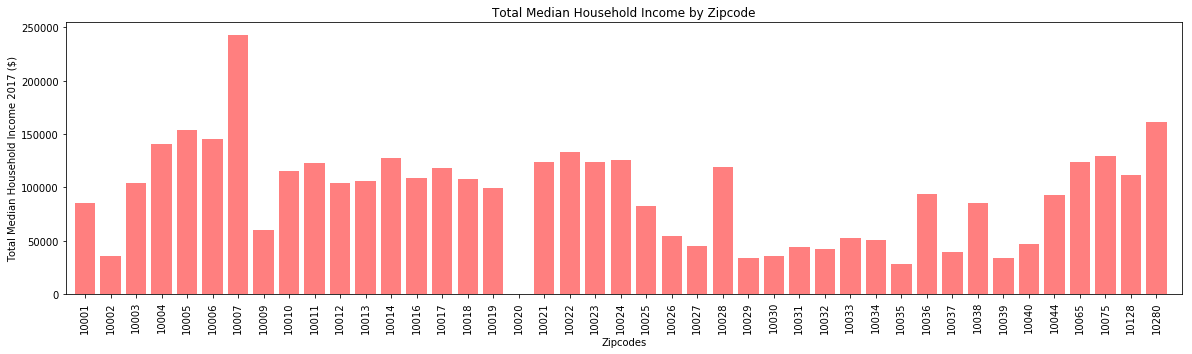

In [24]:
x_axis = np.arange(len(census_man_df['ZIP Codes']))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,5))
plt.bar(x_axis, census_man_df['Total'], color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, census_man_df['ZIP Codes'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))

plt.title("Total Median Household Income by Zipcode")
plt.xlabel("Zipcodes")
plt.ylabel(f"Total Median Household Income {year} ($)")

plt.show()

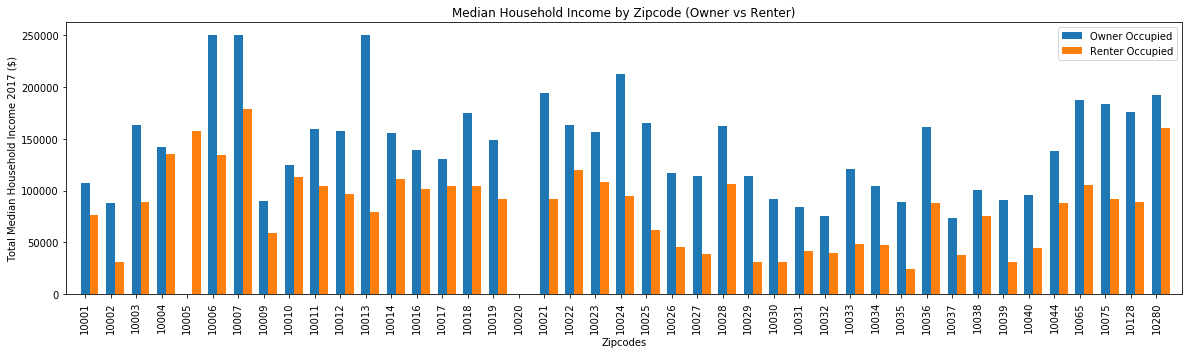

In [25]:
plt.figure(figsize=(20,5))

bar_width = 0.35

plt.bar(x_axis, census_man_df['Owner Occupied'], bar_width, label="Owner Occupied")
plt.bar(x_axis+bar_width, census_man_df['Renter Occupied'], bar_width, label="Renter Occupied")
plt.xticks(tick_locations, census_man_df['ZIP Codes'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))

plt.title("Median Household Income by Zipcode (Owner vs Renter)")
plt.xlabel("Zipcodes")
plt.ylabel(f"Total Median Household Income {year} ($)")

plt.legend()

plt.show()

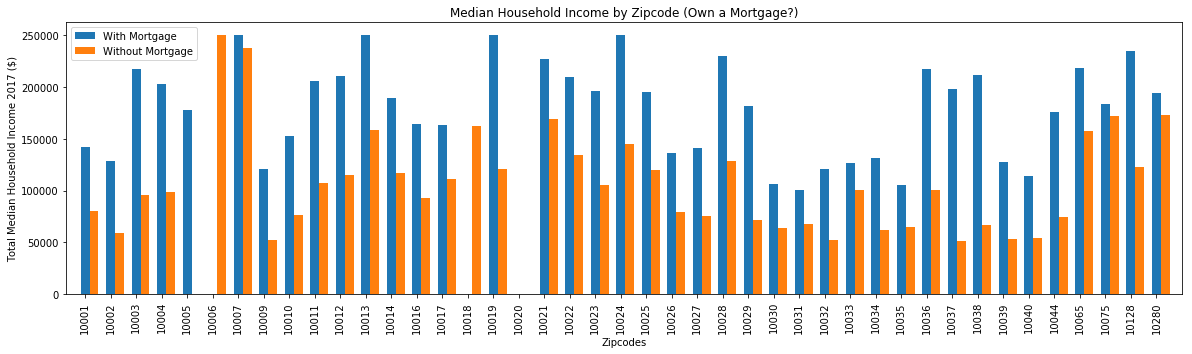

In [26]:
plt.figure(figsize=(20,5))

bar_width = 0.35

plt.bar(x_axis, census_man_df['With Mortgage'], bar_width, label="With Mortgage")
plt.bar(x_axis+bar_width, census_man_df['Without Mortgage'], bar_width, label="Without Mortgage")
plt.xticks(tick_locations, census_man_df['ZIP Codes'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))

plt.title("Median Household Income by Zipcode (Own a Mortgage?)")
plt.xlabel("Zipcodes")
plt.ylabel(f"Total Median Household Income {year} ($)")

plt.legend()

plt.show()

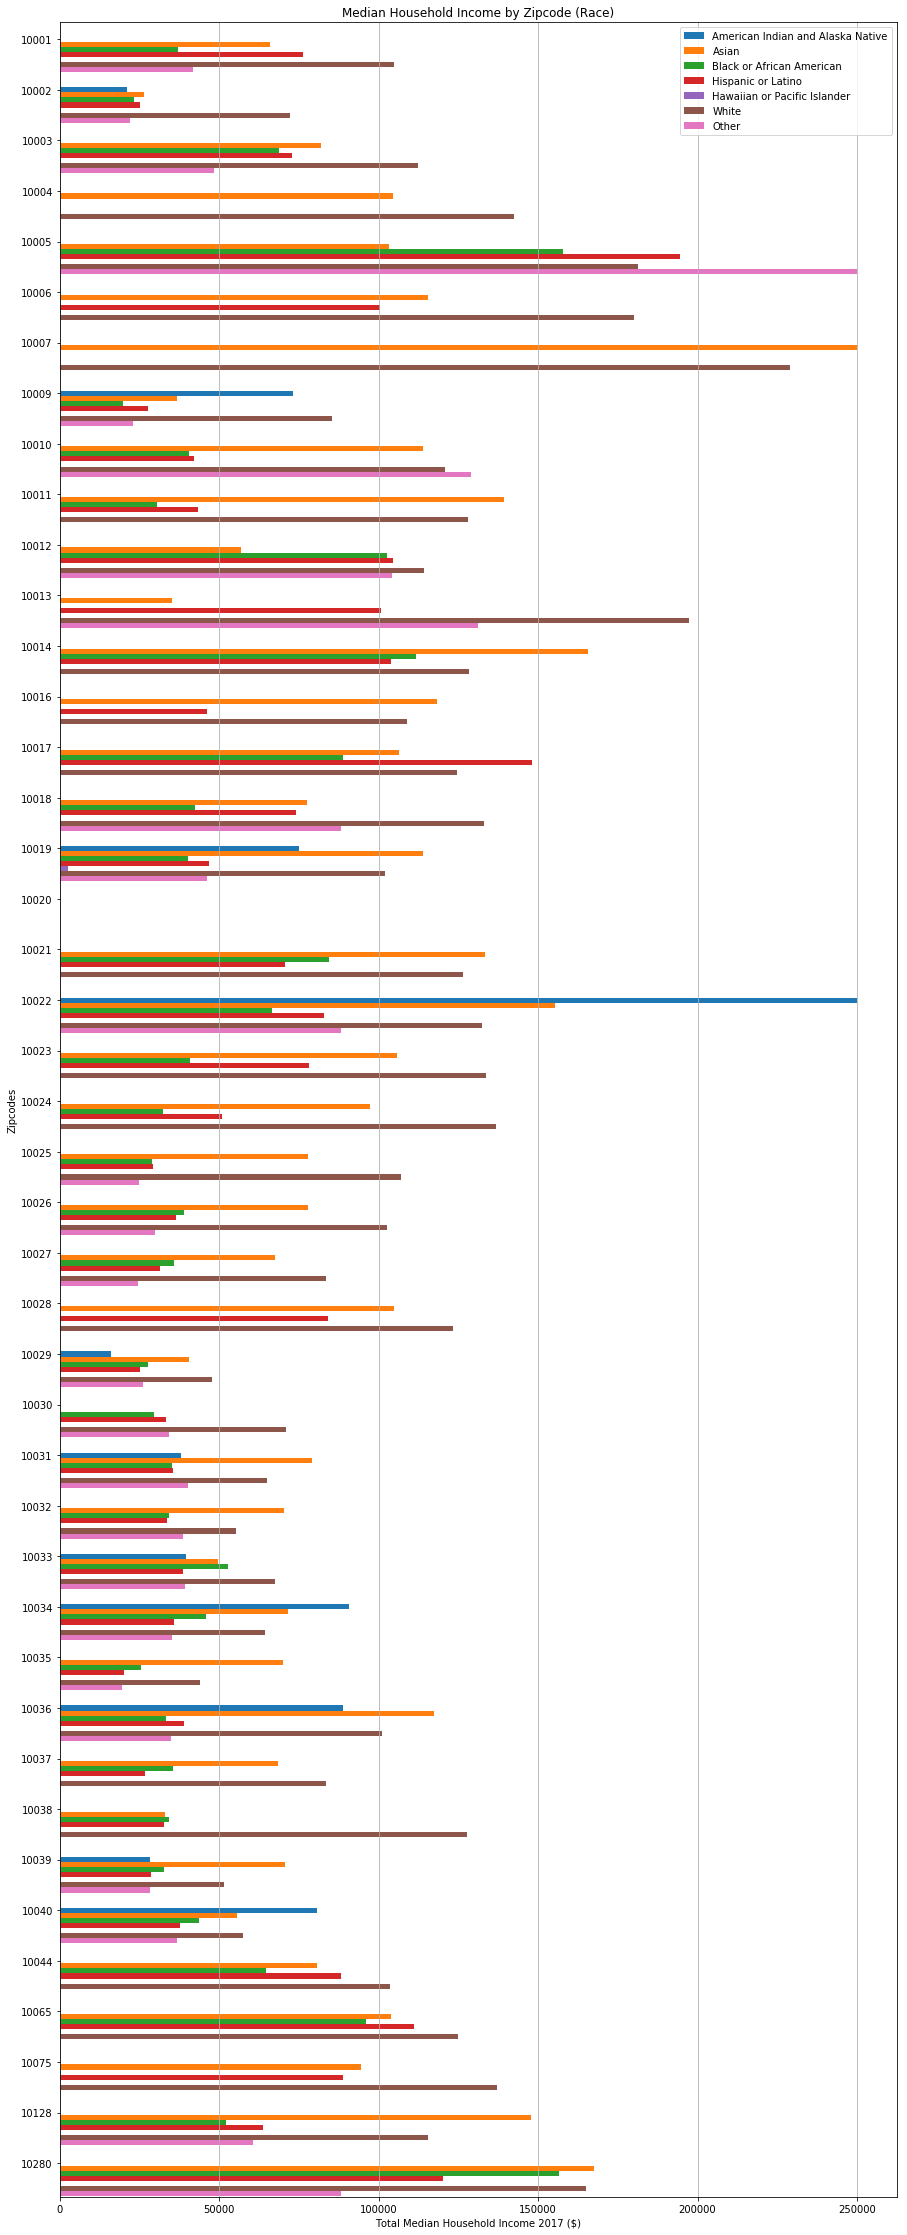

In [19]:
y_axis = np.arange(len(census_man_df['ZIP Codes']))
tick_locations1 = [value*1.5 for value in y_axis]

bar_width = 0.15

plt.figure(figsize=(15,40))
p1 = plt.barh(y_axis*1.5, census_man_df['American Indian and Alaska Native'], bar_width, label='American Indian and Alaska Native')
p2 = plt.barh((y_axis*1.5)+bar_width, census_man_df['Asian'], bar_width, label='Asian')
p3 = plt.barh((y_axis*1.5)+(bar_width*2), census_man_df['Black or African American'], bar_width, label='Black or African American')
p4 = plt.barh((y_axis*1.5)+(bar_width*3), census_man_df['Hispanic or Latino'], bar_width, label='Hispanic or Latino')
p5 = plt.barh((y_axis*1.5)+(bar_width*4), census_man_df['Hawaiian or Pacific Islander'], bar_width, label='Hawaiian or Pacific Islander')
p6 = plt.barh((y_axis*1.5)+(bar_width*5), census_man_df['White'], bar_width, label='White')
p7 = plt.barh((y_axis*1.5)+(bar_width*6), census_man_df['Other'], bar_width, label='Other')

plt.yticks(tick_locations1, census_man_df['ZIP Codes'], rotation="horizontal")
plt.ylim(len(y_axis)+21, -.5)

plt.title("Median Household Income by Zipcode (Race)")
plt.ylabel("Zipcodes")
plt.xlabel(f"Total Median Household Income {year} ($)")
ax = plt.axes()
ax.xaxis.grid(True)
plt.legend(loc=1)

plt.show()